# Mapping the African mtDNA population samples

I like making maps, and what better way to show the distribution and extent of sampling for African mtDNA data?

First, import the various packages required and set some defaults.

In [1]:
%matplotlib inline
import cPickle as pickle
import gzip
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.colors import BoundaryNorm, ListedColormap
pylab.rcParams['figure.figsize'] = 16, 12

Load in the metadata about the population samples.

In [2]:
metadata = pd.read_csv("popdata/metadata.csv")

First, all the sample locations plotted on a topographic map of Africa.

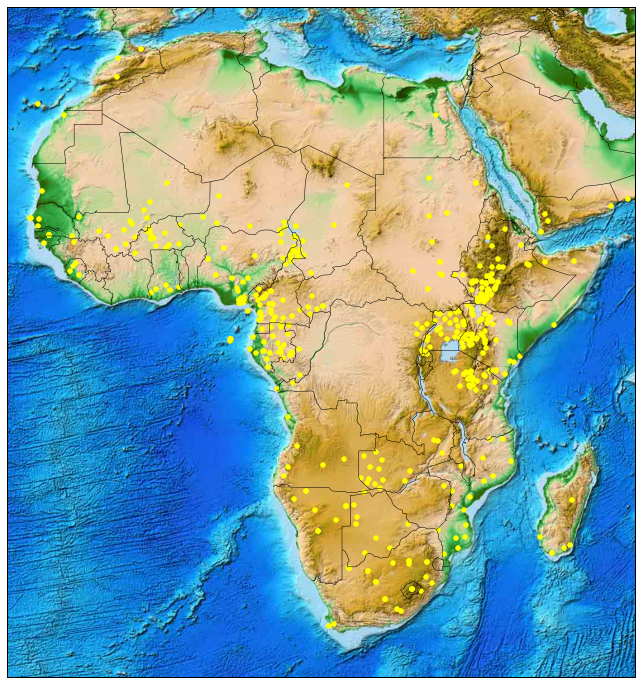

In [3]:
m = Basemap(llcrnrlon=-20,llcrnrlat=-40,urcrnrlon=55,urcrnrlat=40,resolution='l')
m.etopo()
m.drawcountries()
m.scatter(metadata.Longitude, metadata.Latitude, latlon=True, color='yellow')
plt.show()

However, physical geography is perhaps not the most relevant feature for mapping human population sampling. Population density would be more informative. I retrieved the Gridded Population of the World Version 3 (GPWv3) African population data from the [Center for International Earth Science Information Network](http://sedac.ciesin.columbia.edu/gpw) (CIESIN) at Columbia University. I processed population density data for the year 2000 externally using the ```pickle_popdens_data.py``` script in the ```scripts``` folder. Neither the raw nor the processed data are included in this repository because CIESIN does not allow redistribution (but they're easy to get from CIESIN if you want to replicate the map).

In [4]:
with gzip.open('misc/popdens.pkl.gz', 'rb') as f:
    pdd = pickle.load(f)

Create a color map for the population density data.

In [5]:
mycmap = ListedColormap(['#faf7f3','#f1e8dc','#e4d2ba','#d2b48c','#a89070','#7e6c54','#544838'])
mynorm = BoundaryNorm([0,1,5,25,250,1000,10000000000000], mycmap.N)

And plot the map.

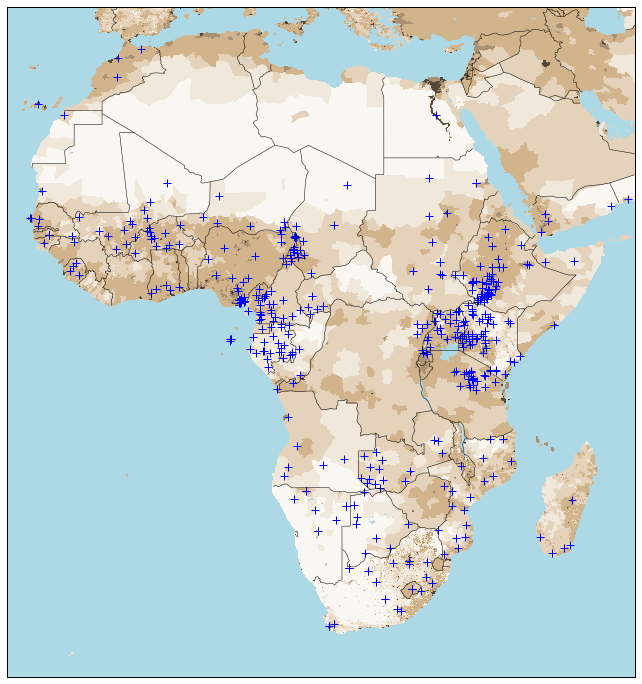

In [6]:
m = Basemap(llcrnrlon=-20,llcrnrlat=-40,urcrnrlon=55,urcrnrlat=40,resolution='l')
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.pcolormesh(pdd['lons'], pdd['lats'], pdd['popdens'], latlon=True, cmap=mycmap, norm=mynorm)
m.scatter(metadata.Longitude, metadata.Latitude, latlon=True, marker='+', s=50, color='blue')
plt.show()

Some of the populations have pretty low sample sizes, so the maps above might be a bit misleading on the amount of practically usable data. First, I'll limit the plot to population samples with at least 20 individuals and plot that.

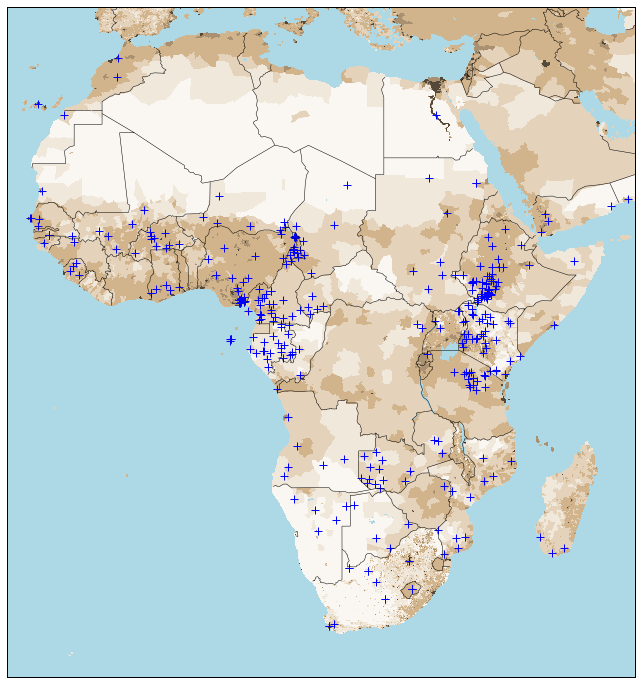

In [7]:
metadata20 = metadata[metadata.N >= 20]
m = Basemap(llcrnrlon=-20,llcrnrlat=-40,urcrnrlon=55,urcrnrlat=40,resolution='l')
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.pcolormesh(pdd['lons'], pdd['lats'], pdd['popdens'], latlon=True, cmap=mycmap, norm=mynorm)
m.scatter(metadata20.Longitude, metadata20.Latitude, latlon=True, marker='+', s=50, color='blue')
plt.show()

Not too many points are lost. But restricting the plot to population samples with at least 50 individuals leads to a pretty dramatic drop off.

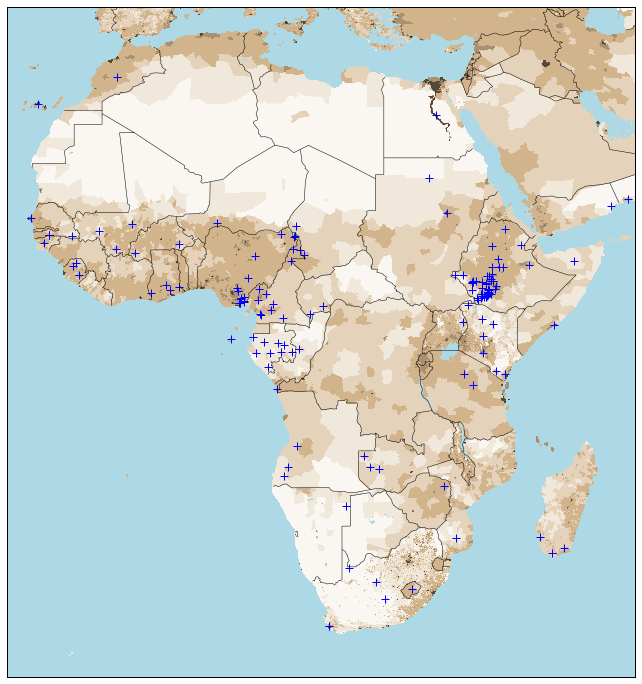

In [8]:
metadata50 = metadata[metadata.N >= 50]
m = Basemap(llcrnrlon=-20,llcrnrlat=-40,urcrnrlon=55,urcrnrlat=40,resolution='l')
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.pcolormesh(pdd['lons'], pdd['lats'], pdd['popdens'], latlon=True, cmap=mycmap, norm=mynorm)
m.scatter(metadata50.Longitude, metadata50.Latitude, latlon=True, marker='+', s=50, color='blue')
plt.show()